In [1]:
import sys
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import os
import inspect

project_path = os.path.abspath( os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) + "/../")
sys.path.insert(0, project_path)

from Program.Objects.Human import Human
from Program.Objects.Issue import Issue
from Program.Objects.Machine import Machine
from Program.Objects.MaintenanceWorkOrder import MaintenanceWorkOrder
from Program.Objects.Tag import Tag

from Program.Database.Database_Properties import *
from Program.Database.Database import *
from Program.Database.Main import *

from Program.KPI.KPI import *


from Program.Others.MyDate import *

# DATABASE

## FILES

### NIST server

### Greystone

In [2]:
PassWord = 'GREYSTONE!!'
file = os.path.join(project_path , 'Data_CSV', 'GreyStone_Data.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 15,
                NodeHuman.VALUE_OPERATOR.value: 13,

                NodeTag.VALUE_ITEM.value: 2,
                NodeTag.VALUE_PROBLEM.value: 3,
                NodeTag.VALUE_SOLUTION.value: 4,

                NodeMachine.VALUE_MACHINE.value: 7,
                NodeIssue.VALUE_MACHINE_DOWN.value: 8,

                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 0,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 1,
                NodeIssue.VALUE_PART_PROCESS.value: 16,
                }

### Psu

In [ ]:
PassWord = 'PSU!!'
file = os.path.join(project_path , 'Data_CSV', 'Psu_Data.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 18,

                NodeMachine.VALUE_MACHINE.value: 3,
                NodeMachine.VALUE_TYPE.value:6,
                NodeMachine.VALUE_MANUFACTURER.value:5,
                NodeMachine.VALUE_LOCASION.value:4,


                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 11,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 19,
                NodeIssue.VALUE_DESCRIPTION_CAUSE.value:12,
                NodeIssue.VALUE_MACHINE_DOWN.value: 13,
                }

### Hvac

In [ ]:
PassWord = 'HVAC!!'
file = os.path.join(project_path , 'Data_CSV', 'Hvac_Data.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 10,
                NodeHuman.VALUE_OPERATOR.value: 43,

                NodeMachine.VALUE_MACHINE.value: 7,

                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 5,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 247,
                }

### Auto

In [ ]:
PassWord = 'AUTO!!'
file = os.path.join(project_path , 'Data_CSV', 'Auto_Data.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 4,
                NodeHuman.VALUE_OPERATOR.value: 11,
                NodeHuman.VALUE_CRAFTS.value: 16,
                NodeHuman.VALUE_SKILLS.value: 17,

                NodeMachine.VALUE_MACHINE.value: 8,

                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 5,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 7,
                }

### Mine

In [ ]:
PassWord = 'MINE!!'
file = os.path.join(project_path , 'Data_CSV', 'Mine_Data.csv')

localization = {}

## ACTION

### Connect

In [3]:
database = DatabaseNeo4J("bolt://127.0.0.1:7687", "neo4j", PassWord)

## Indexs

In [5]:
database.createIndexes()

In [4]:
database.dropIndexes()

## Data

In [7]:
GraphDatabaseCsv(database, file, localization)

100%|██████████| 3438/3438 [00:40<00:00, 85.93it/s]


In [6]:
database.deleteData()

# KPI

In [8]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = 16, 20

machine_name = "machine.%s"%NodeMachine.PROPERTY_NAME.value

technician_name = "technician.%s"%NodeHuman.PROPERTY_NAME.value
operator_name = "operator.%s"%NodeHuman.PROPERTY_NAME.value

issue_problem = "issue.%s"%NodeIssue.PROPERTY_DESCRIPTION_PROBLEM.value
issue_solution = "issue.%s"%NodeIssue.PROPERTY_DESCRIPTION_SOLUTION.value

tag_item = "item.%s"%NodeTag.PROPERTY_KEYWORD.value
tag_problem = "problem_action.%s"%NodeTag.PROPERTY_KEYWORD.value
tag_solution = "solution_action.%s"%NodeTag.PROPERTY_KEYWORD.value

issue_date_issue = "issue.%s"%NodeIssue.PROPERTY_DATE_MAINTENANCE_WORK_ORDER_ISSUE.value
issue_date_close = "issue.%s"%NodeIssue.PROPERTY_DATE_MAINTENANCE_WORK_ORDER_CLOSE.value

time = "time"
count = "count"
avg = "average"

## BarPlot something Per something

In [9]:
filter_value= tag_item    # what do you want to represent
x_value= tag_solution     # over what value

dataframe = abstract_kpi_time_mwo(database=database, x_value=x_value, filter_value=filter_value, time_value=time, count_value=count,average_value=avg )

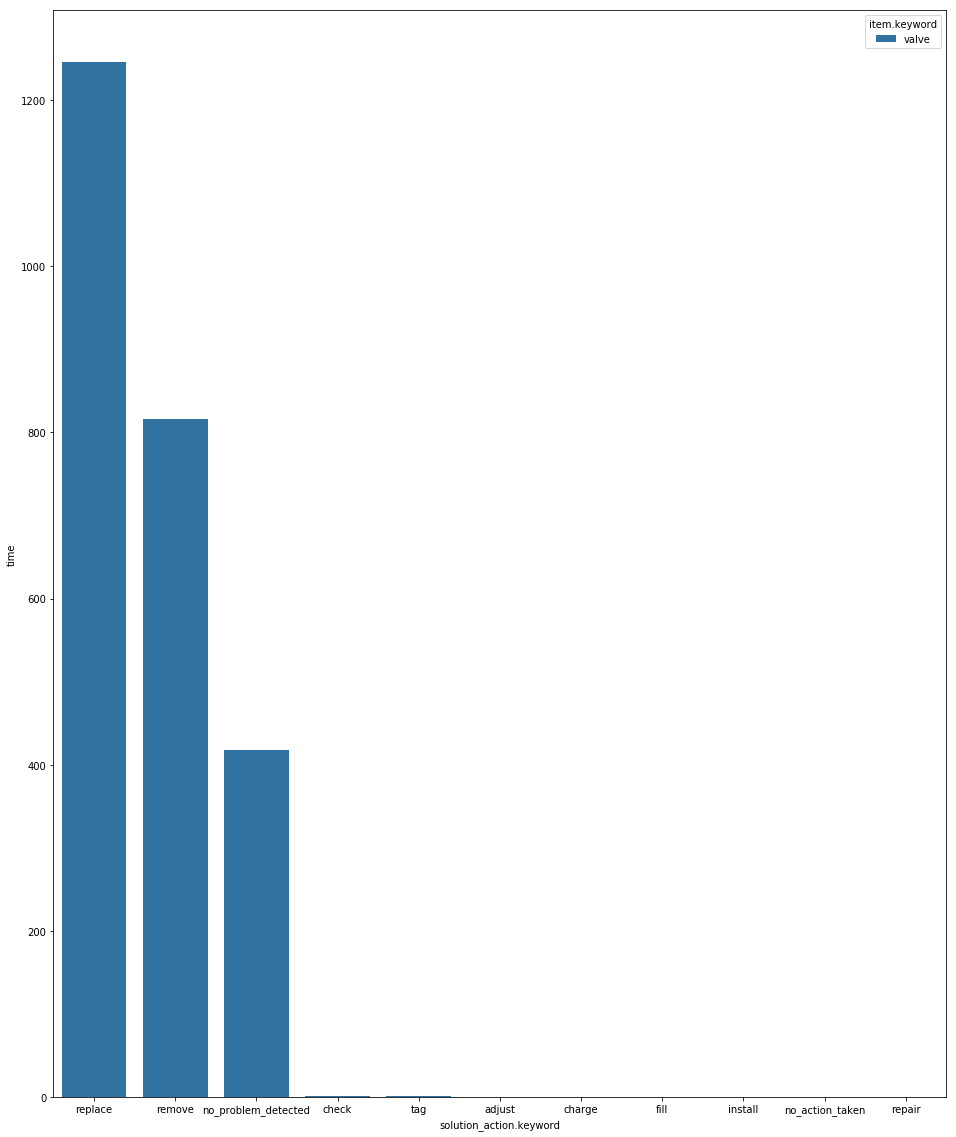

In [10]:
#y_value = count     # Number of issue
y_value = time       # sum of time spend
#y_value = avg       # avereage time spend

filter = ["valve"]   # filter on your "filter_value"

data=dataframe[(dataframe[filter_value].isin(filter))].sort_values(by=[y_value], ascending=False)
data= data[data[y_value].notnull()]     #comment if you want the null values to appeared

ax = sns.barplot(x=x_value, y=y_value, hue=filter_value,  data=data)

## TimeLinePlot something overtime

In [17]:
filter_value= machine_name    # what do you want to represent
date = issue_date_issue

dataframe = abstract_kpi_timeline(database=database, date_value=date, filter_value=filter_value, time_value=time, count_value=count,average_value=avg )

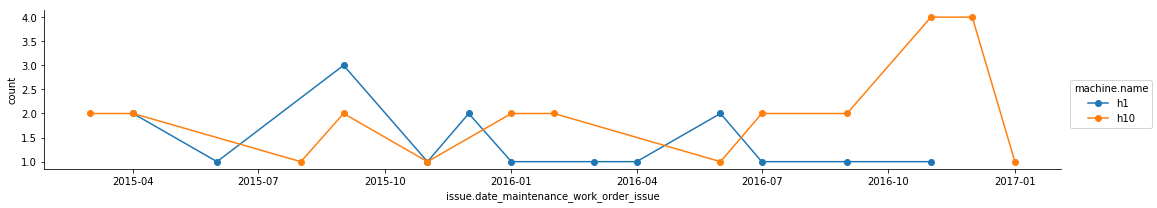

In [25]:
y_value = count     # Number of issue
#y_value = time       # sum of time spend
#y_value = avg       # avereage time spend


data = dataframe[[y_value,filter_value,date]]

# data = dataframe[[y_value,filter_value,date]]
# temps = data[date][1].to_datetime()
# print(temps.month)

filter = ["h10", "h1"]   # filter on your "filter_value"
data = data[data[filter_value].isin(filter)]

g = sns.FacetGrid(data, hue=filter_value, size=3, aspect=5)
g.map(plt.plot, date, y_value, marker='o').add_legend()

In [15]:
dataframe


,technician.name,issue.date_maintenance_work_order_issue,count,time,average
0,a,2015-03-01,2.0,0.000000,0.000000
1,a,2015-04-01,1.0,0.000000,0.000000
2,a,2015-08-01,1.0,0.000000,0.000000
3,a,2015-09-01,1.0,0.000000,0.000000
4,a,2015-10-01,1.0,0.000000,0.000000
5,a,2016-02-01,1.0,0.000000,0.000000
6,a,2016-06-01,7.0,71.250000,10.178571
7,a,2016-07-01,7.0,33.500000,4.785714
8,a,2016-08-01,4.0,18.750000,4.687500
9,a,2016-09-01,3.0,0.000000,0.000000
